S = 50.0, Call price: 0.0, Put price: 46.60067
S = 50.1, Call price: 0.0, Put price: 46.50362
S = 50.2, Call price: 0.0, Put price: 46.40658
S = 50.300000000000004, Call price: 0.0, Put price: 46.30953
S = 50.400000000000006, Call price: 0.0, Put price: 46.21249
S = 50.50000000000001, Call price: 0.0, Put price: 46.11544
S = 50.60000000000001, Call price: 0.0, Put price: 46.0184
S = 50.70000000000001, Call price: 0.0, Put price: 45.92135
S = 50.80000000000001, Call price: 0.0, Put price: 45.82431
S = 50.90000000000001, Call price: 0.0, Put price: 45.72726
S = 51.000000000000014, Call price: 0.0, Put price: 45.63022
S = 51.100000000000016, Call price: 0.0, Put price: 45.53318
S = 51.20000000000002, Call price: 0.0, Put price: 45.43613
S = 51.30000000000002, Call price: 0.0, Put price: 45.33909
S = 51.40000000000002, Call price: 0.0, Put price: 45.24204
S = 51.50000000000002, Call price: 0.0, Put price: 45.145
S = 51.60000000000002, Call price: 0.0, Put price: 45.04795
S = 51.70000000000

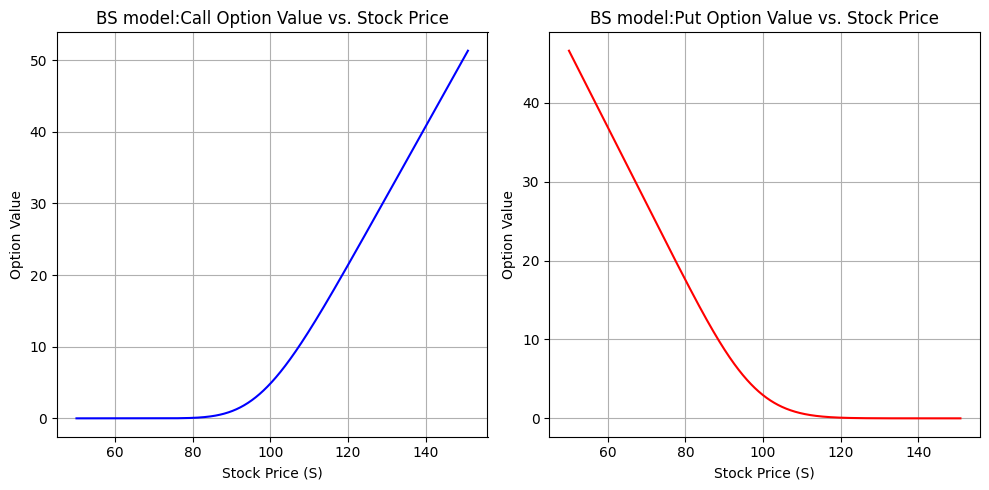

In [11]:
##BS model
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
T = 1       # Maturity
K = 100      # Strike
r = 0.05     # Interest Rate
q = 0.03     # Dividend Rate
sigma = 0.1    # Volatility
S = np.arange(50, 151, 0.1)  # Stock Price Range

# Calculates d1 and d2
d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = (np.log(S/K) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Calculates call and put
Vc_BS = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
Vp_BS = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

# Displaying results
for i, S0 in enumerate(S):
    print(f'S = {S0}, Call price: {round(Vc_BS[i], 5)}, Put price: {round(Vp_BS[i], 5)}')

# Plot
plt.figure(figsize=(10, 5))

#Call Optionp
plt.subplot(1, 2, 1)
plt.plot(S, Vc_BS, label='Call Value', color='blue')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Value')
plt.title('BS model:Call Option Value vs. Stock Price')
plt.grid(True)

#Put Option
plt.subplot(1, 2, 2)
plt.plot(S, Vp_BS, label='Put Value', color='red')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Value')
plt.title('BS model:Put Option Value vs. Stock Price')
plt.grid(True)

plt.tight_layout()
plt.show()


S0 = 50.0, Call price: 1.03099, Put price: 47.63165
S0 = 50.1, Call price: 1.02616, Put price: 47.52978
S0 = 50.2, Call price: 1.02134, Put price: 47.42792
S0 = 50.300000000000004, Call price: 1.01655, Put price: 47.32608
S0 = 50.400000000000006, Call price: 1.01177, Put price: 47.22426
S0 = 50.50000000000001, Call price: 1.00701, Put price: 47.12245
S0 = 50.60000000000001, Call price: 1.00226, Put price: 47.02066
S0 = 50.70000000000001, Call price: 0.99754, Put price: 46.91889
S0 = 50.80000000000001, Call price: 0.99283, Put price: 46.81714
S0 = 50.90000000000001, Call price: 0.98814, Put price: 46.71541
S0 = 51.000000000000014, Call price: 0.98347, Put price: 46.61369
S0 = 51.100000000000016, Call price: 0.97882, Put price: 46.51199
S0 = 51.20000000000002, Call price: 0.97418, Put price: 46.41031
S0 = 51.30000000000002, Call price: 0.96956, Put price: 46.30865
S0 = 51.40000000000002, Call price: 0.96496, Put price: 46.207
S0 = 51.50000000000002, Call price: 0.96038, Put price: 46.105

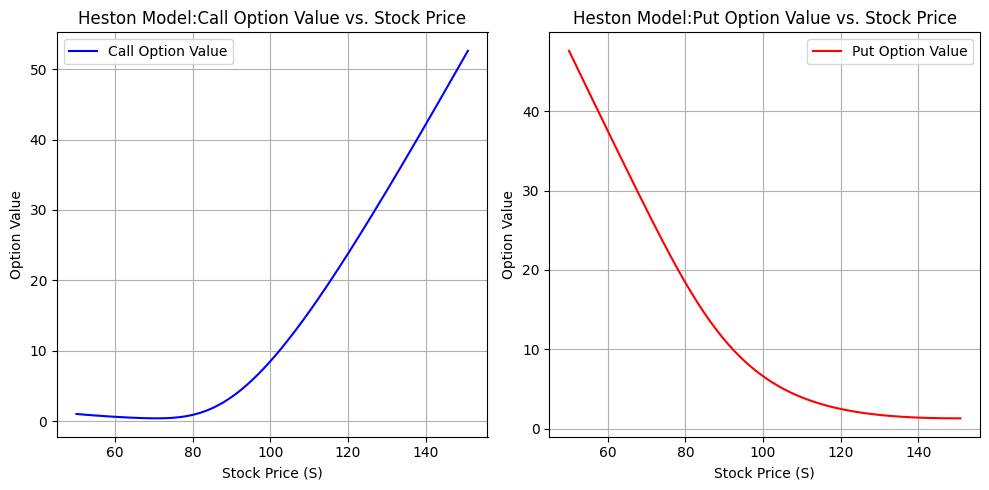

In [12]:
###Heston Model
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
T = 1
K = 100
S = np.arange(50, 151, 0.1)
r = 0.05
q = 0.03
v0 = 0.04
rho = -0.7
kappa = 2
theta = 0.04
sigma = 0.3
lmbda = 0

# Arrays to store option values
Vc_Heston = np.zeros_like(S)
Vp_Heston = np.zeros_like(S)

# Calculating option prices
for i, S0 in enumerate(S):
    call_price = 0
    for j in [1, 2]:
        integral = 0
        for phi in np.linspace(0.001, 100, 500):  # Integration over phi
            if j == 1:
                u = 0.5
                b = kappa + lmbda - rho * sigma
            else:
                u = -0.5
                b = kappa + lmbda

            #calculate heston model

            d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2))
            g = (b - rho * sigma * phi * 1j + d) / (b - rho * sigma * phi * 1j - d)
            C = (r - q) * phi * 1j * T + (kappa * theta / sigma**2) * ((b - rho * sigma * phi * 1j + d) * T - 2 * np.log((1 - g * np.exp(d * T))/(1 - g)))
            D = (b - rho * sigma * phi * 1j + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))
            f = np.exp(C + D * v0 + 1j * phi * np.log(S0))

            integrand = np.real(np.exp(-1j * phi * np.log(K)) * f / (1j * phi))
            integral += integrand * (100 / 500)  # Approximate the integral

        #Calculate probability of Heston Model
        pro_Heston = 0.5 + (1 / np.pi) * integral
        if j == 1:
            call_price += S0 * np.exp(-q * T) * pro_Heston
        else:
            call_price -= K * np.exp(-r * T) * pro_Heston

    Vc_Heston[i] = call_price
    Vp_Heston[i] = call_price + K * np.exp(-r * T) - S0 * np.exp(-q * T)

# Displaying results
for i, S0 in enumerate(S):
    print(f'S0 = {S0}, Call price: {round(Vc_Heston[i], 5)}, Put price: {round(Vp_Heston[i], 5)}')

# Plot
plt.figure(figsize=(10, 5))

# Call option
plt.subplot(1, 2, 1)
plt.plot(S, Vc_Heston, 'b-', label='Call Option Value')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Value')
plt.title('Heston Model:Call Option Value vs. Stock Price')
plt.grid(True)
plt.legend()

# Put option
plt.subplot(1, 2, 2)
plt.plot(S, Vp_Heston, 'r-', label='Put Option Value')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Value')
plt.title('Heston Model:Put Option Value vs. Stock Price')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


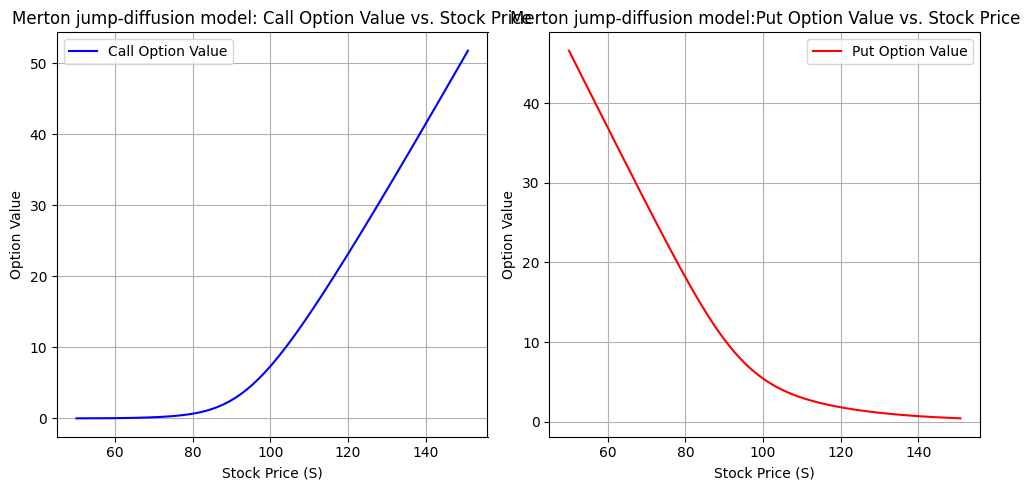

In [13]:
# Merton jump-diffusion model
## parameters
T = 1
K = 100
r = 0.05
q = 0.03
S = np.arange(50, 151, 0.1)
sigma = 0.1

# Model parameters for the jump part
mu_j = -0.1
sigma_j = 0.2
lmbda = 0.5


# Call and Put values for each S
Vc_Merton = np.zeros_like(S)
Vp_Merton = np.zeros_like(S)

max_iter = 1000
stop_cond = 1e-16

for i, S_val in enumerate(S):
    Vc_temp = 0
    Vp_temp = 0
    for k in range(max_iter):
        r_k = r - lmbda * (np.exp(mu_j + 0.5 * sigma_j**2) - 1) + (k * (mu_j + 0.5 * sigma_j**2)) / T
        sigma_k = np.sqrt(sigma**2 + (k * sigma_j**2) / T)

        # Black-Scholes calculations for call and put
        d1 = (np.log(S_val/K) + (r_k - q + sigma_k**2/2)*T) / (sigma_k*np.sqrt(T))
        d2 = d1 - sigma_k * np.sqrt(T)
        bs_call = S_val * np.exp(-q*T) * norm.cdf(d1) - K * np.exp(-r_k*T)* norm.cdf(d2)
        bs_put = K * np.exp(-r_k*T) * norm.cdf(-d2) - S_val * np.exp(-q*T) * norm.cdf(-d1)

        sum_k_call = (np.exp(-(np.exp(mu_j + 0.5 * sigma_j**2)) * lmbda * T) * ((np.exp(mu_j + 0.5 * sigma_j**2)) * lmbda * T)**k / np.math.factorial(k)) * bs_call
        sum_k_put = (np.exp(-(np.exp(mu_j + 0.5 * sigma_j**2)) * lmbda * T) * ((np.exp(mu_j + 0.5 * sigma_j**2)) * lmbda * T)**k / np.math.factorial(k)) * bs_put

        Vc_temp += sum_k_call
        Vp_temp += sum_k_put

        if sum_k_call < stop_cond and sum_k_put < stop_cond:
            break

    Vc_Merton[i] = Vc_temp
    Vp_Merton[i] = Vp_temp

# Plot
plt.figure(figsize=(10, 5))

# Call option
plt.subplot(1, 2, 1)
plt.plot(S, Vc_Merton, 'b-', label='Call Option Value')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Value')
plt.title('Merton jump-diffusion model: Call Option Value vs. Stock Price')
plt.grid(True)
plt.legend()

# Put option
plt.subplot(1, 2, 2)
plt.plot(S, Vp_Merton, 'r-', label='Put Option Value')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Value')
plt.title('Merton jump-diffusion model:Put Option Value vs. Stock Price')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


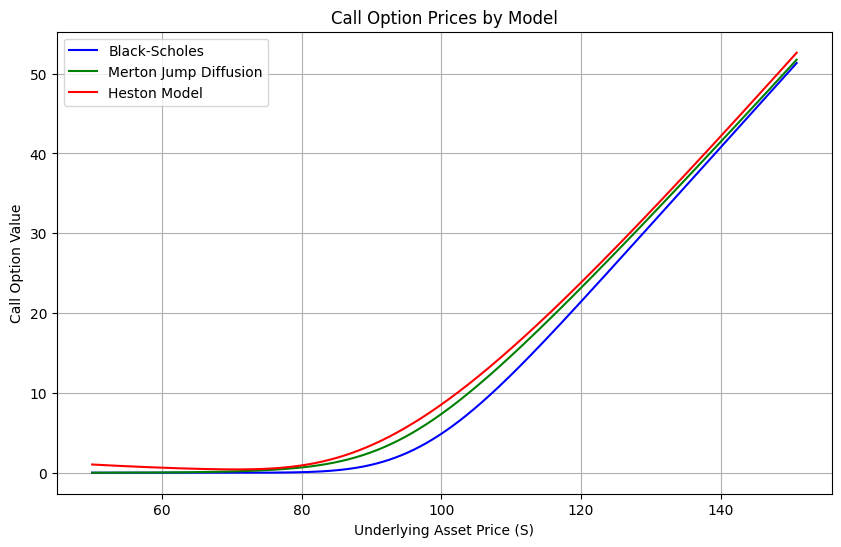

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S, Vc_BS, label='Black-Scholes', color='blue')
plt.plot(S, Vc_Merton, label='Merton Jump Diffusion', color='green')
plt.plot(S, Vc_Heston, label='Heston Model', color='red')
plt.title('Call Option Prices by Model')
plt.xlabel('Underlying Asset Price (S)')
plt.ylabel('Call Option Value')
plt.legend()
plt.grid(True)
plt.show()


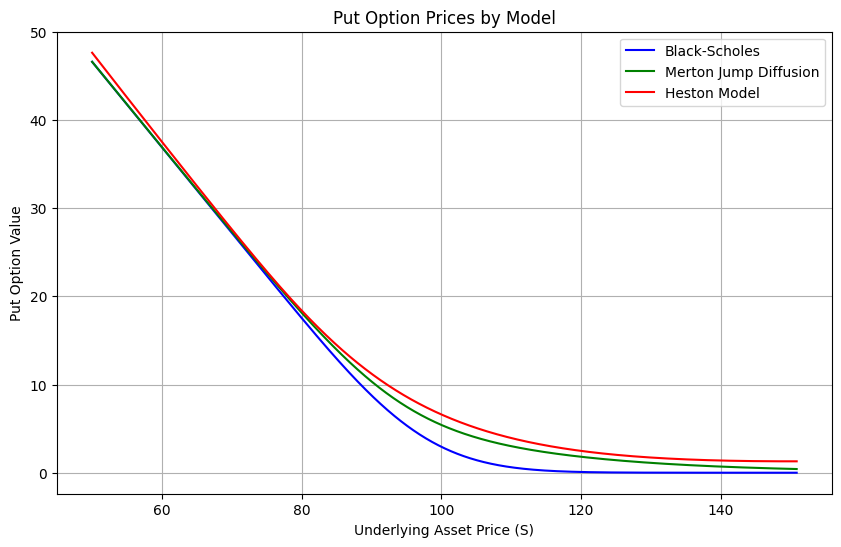

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(S, Vp_BS, label='Black-Scholes', color='blue')
plt.plot(S, Vp_Merton, label='Merton Jump Diffusion', color='green')
plt.plot(S, Vp_Heston, label='Heston Model', color='red')
plt.title('Put Option Prices by Model')
plt.xlabel('Underlying Asset Price (S)')
plt.ylabel('Put Option Value')
plt.legend()
plt.grid(True)
plt.show()